In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
import numpy as np

In [5]:
col_names_of_interest = ["CMPD_CHEMBLID", "CANONICAL_SMILES", "STANDARD_VALUE"]

df = pd.read_table("bioactivity-19_11_29_01.xls")
print(df.shape)
print(df.drop_duplicates().shape)

unique_chemldIDs = df["CMPD_CHEMBLID"].unique()
print("There are {} unique chembl IDs in {} total rows".format(unique_chemldIDs.shape[0], df.shape[0]))

df = df.dropna(subset=col_names_of_interest) # Remove missing values
df = df.drop_duplicates(subset=["CMPD_CHEMBLID"])

print("#missing values by column (before cleaning):", {name : df[name].isna().sum() for name in col_names_of_interest})
print("Cleaned dataset has shape {}".format(df.shape))
print("#missing values by column (after cleaning):", {name : df[name].isna().sum() for name in col_names_of_interest})

df.to_csv("bioactivity_clean.csv", index=False)

(3901, 61)
(3901, 61)
There are 3176 unique chembl IDs in 3901 total rows
#missing values by column (before cleaning): {'CMPD_CHEMBLID': 0, 'CANONICAL_SMILES': 0, 'STANDARD_VALUE': 0}
Cleaned dataset has shape (2250, 61)
#missing values by column (after cleaning): {'CMPD_CHEMBLID': 0, 'CANONICAL_SMILES': 0, 'STANDARD_VALUE': 0}


In [64]:
df["CANONICAL_SMILES"].sample().values[0]

'Oc1ccc(cc1)[C@@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4'

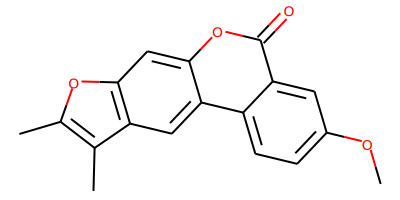

In [81]:
# Draw a random smile

m = Chem.MolFromSmiles(df["CANONICAL_SMILES"].sample().values[0])
from rdkit.Chem import AllChem
import rdkit.Chem as Chem
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem import rdDepictor

def draw_pretty_pics(mol):
    rdDepictor.Compute2DCoords(mol)
    mc_mol = rdMolDraw2D.PrepareMolForDrawing(mol, kekulize=True)
    drawer = rdMolDraw2D.MolDraw2DSVG(400, 200)
    drawer.DrawMolecule(mc_mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace("svg:", "")
    return SVG(svg)

draw_pretty_pics(m)